In [4]:
!pip install fbprophet

    100% |████████████████████████████████| 3.4MB 9.6MB/s 
    100% |████████████████████████████████| 68.1MB 660kB/s 
  Running setup.py bdist_wheel for fbprophet ... - error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-4m187th6/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-y1_wq8v1 --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-4m187th6/fbprophet/setup.py", line 123, in <module>
      """
    File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 129, in setup
      return distutils.core.setup(**attrs)
    File "/usr/lib/python

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

from google.colab import files
uploaded = files.upload()

Saving example_wp_log_peyton_manning.csv to example_wp_log_peyton_manning.csv
Saving CCJ.csv to CCJ (1).csv


In [34]:
# Python
import io

df = pd.read_csv(io.StringIO(uploaded['CCJ.csv'].decode('utf-8')))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-03,9.12,9.29,9.12,9.19,8.999260,835000
1,2017-07-05,9.16,9.29,9.10,9.24,9.048222,2121500
2,2017-07-06,9.24,9.37,9.20,9.22,9.028637,1688600
3,2017-07-07,9.23,9.31,9.08,9.27,9.077600,882000
4,2017-07-10,9.29,9.70,9.22,9.59,9.390959,1807000


In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

ccj = pd.read_csv(io.StringIO(uploaded['CCJ.csv'].decode('utf-8')), parse_dates=['Date'], date_parser=dateparse)

In [49]:
test = pd.read_csv(io.StringIO(uploaded['CCJ.csv'].decode('utf-8')), parse_dates=['Date'], date_parser=dateparse)
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-03,9.12,9.29,9.12,9.19,8.999260,835000
1,2017-07-05,9.16,9.29,9.10,9.24,9.048222,2121500
2,2017-07-06,9.24,9.37,9.20,9.22,9.028637,1688600
3,2017-07-07,9.23,9.31,9.08,9.27,9.077600,882000
4,2017-07-10,9.29,9.70,9.22,9.59,9.390959,1807000


In [36]:
ccj.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-03,9.12,9.29,9.12,9.19,8.999260,835000
1,2017-07-05,9.16,9.29,9.10,9.24,9.048222,2121500
2,2017-07-06,9.24,9.37,9.20,9.22,9.028637,1688600
3,2017-07-07,9.23,9.31,9.08,9.27,9.077600,882000
4,2017-07-10,9.29,9.70,9.22,9.59,9.390959,1807000


In [0]:
import matplotlib.pyplot as plt

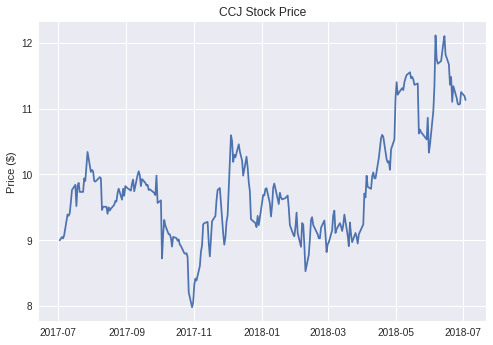

In [38]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(ccj.Date, ccj['Adj Close'])
plt.title('CCJ Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [0]:
ccj_prophet = pd.DataFrame()
ccj_prophet['ds'] = ccj['Date']

In [40]:
ccj_prophet.head()

,ds
0,2017-07-03
1,2017-07-05
2,2017-07-06
3,2017-07-07
4,2017-07-10


In [0]:
ccj_prophet['y'] = ccj['Adj Close']

In [55]:
ccj_prophet.head()

,ds,y
0,2017-07-03,8.999260
1,2017-07-05,9.048222
2,2017-07-06,9.028637
3,2017-07-07,9.077600
4,2017-07-10,9.390959


In [53]:
test = pd.read_csv(io.StringIO(uploaded['example_wp_log_peyton_manning.csv'].decode('utf-8')))
test.head()

ParserError: ignored

In [58]:
m = Prophet()
ccj_prophet= m.fit(ccj_prophet)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [59]:
ccj_prophet

In [0]:
ccj_forecast = ccj_prophet.make_future_dataframe(periods=365, freq='D')


In [0]:
ccj_forecast = ccj_prophet.predict(ccj_forecast)

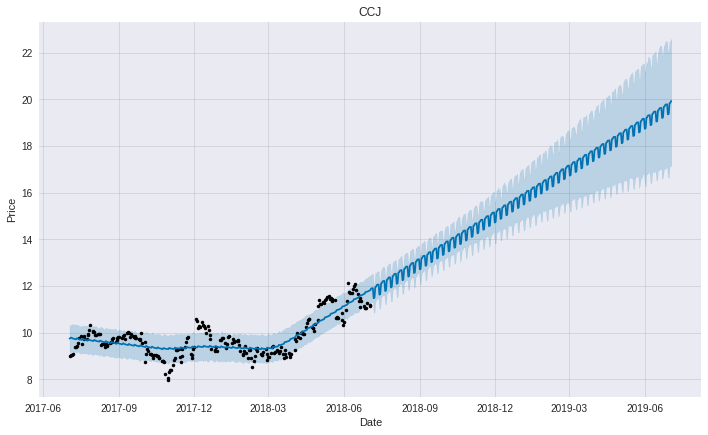

In [67]:
ccj_prophet.plot(ccj_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('CCJ');

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
https://facebook.github.io/prophet/docs/quick_start.html


In [86]:
uploaded = files.upload()

Saving PANW (2).csv to PANW (2).csv


In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

panw = pd.read_csv(io.StringIO(uploaded['PANW (2).csv'].decode('utf-8')), parse_dates=['Date'], date_parser=dateparse)

In [88]:
panw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-03,134.850006,135.710007,132.399994,132.929993,132.929993,593100
1,2017-07-05,132.940002,134.660004,132.110001,133.830002,133.830002,1152700
2,2017-07-06,133.080002,133.949997,131.750000,132.639999,132.639999,960200
3,2017-07-07,135.149994,138.350006,134.740005,136.149994,136.149994,1598100
4,2017-07-10,136.460007,138.600006,135.600006,137.570007,137.570007,1372900


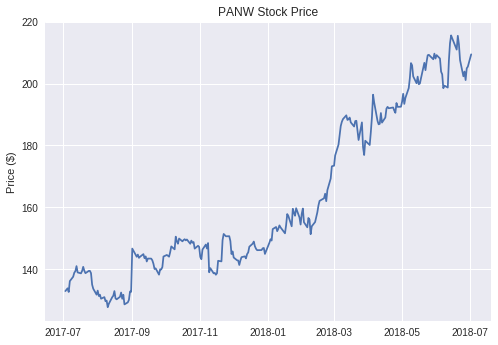

In [89]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(panw.Date, panw['Adj Close'])
plt.title('PANW Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [0]:
panw_prophet = pd.DataFrame()
panw_prophet['ds'] = panw['Date']
panw_prophet['y'] = panw['Adj Close']

In [91]:
m = Prophet()
panw_prophet= m.fit(panw_prophet)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


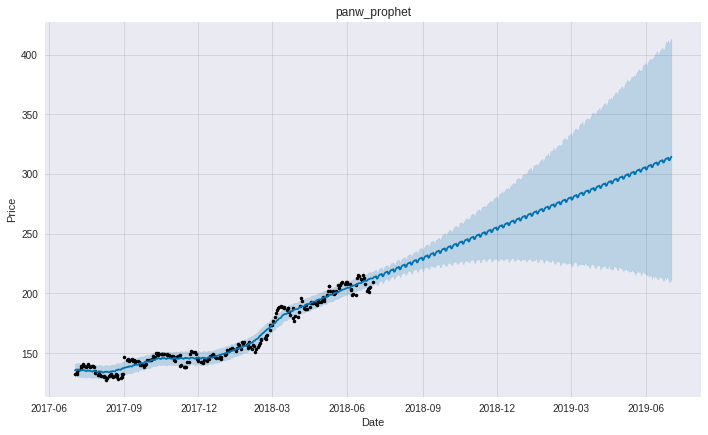

In [92]:
panw_forecast = panw_prophet.make_future_dataframe(periods=365, freq='D')
panw_forecast = panw_prophet.predict(panw_forecast)

panw_prophet.plot(panw_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('panw_prophet');

In [114]:
uploaded = files.upload()

Saving PUK.csv to PUK.csv


In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

rtrx = pd.read_csv(io.StringIO(uploaded['PUK.csv'].decode('utf-8')), parse_dates=['Date'], date_parser=dateparse)

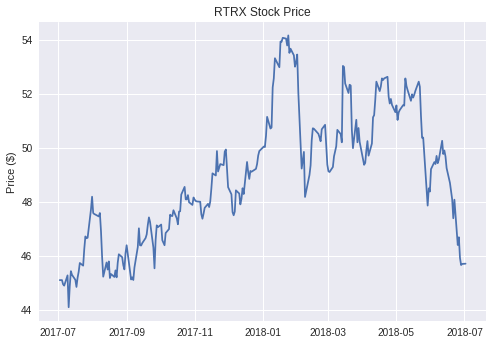

In [116]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(rtrx.Date, rtrx['Adj Close'])
plt.title('RTRX Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [0]:
rtrx_prophet = pd.DataFrame()
rtrx_prophet['ds'] = rtrx['Date']
rtrx_prophet['y'] = rtrx['Adj Close']

In [118]:
m = Prophet()
rtrx_prophet= m.fit(rtrx_prophet)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


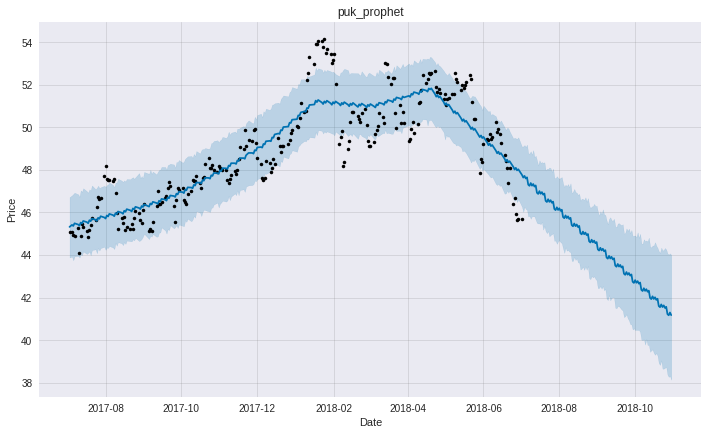

In [119]:
rtrx_forecast = rtrx_prophet.make_future_dataframe(periods=120, freq='D')
rtrx_forecast = rtrx_prophet.predict(rtrx_forecast)

rtrx_prophet.plot(rtrx_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('puk_prophet');